<a href="https://colab.research.google.com/github/hamagami/preprocess/blob/main/04_07_%E3%82%B9%E3%82%B1%E3%83%BC%E3%83%AA%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# スケーリング

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



from sklearn.datasets import fetch_california_housing

# sklearn には色々なスケーリング関数がある。　
ここではこれらのうち一部しか使わない。詳しくは　https://qiita.com/nazoking@github/items/d6ac1948ee138d73fef1


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

ハウジングデータセットを読みこむ。ちょっと時間かかります

In [4]:
data  =fetch_california_housing()

データをpandas.Dataframeにいれる


In [5]:
df = pd.DataFrame(np.c_[data.data, data.target], columns=data.feature_names + ["target"])
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Populationについて単純にヒストグラムをつくる

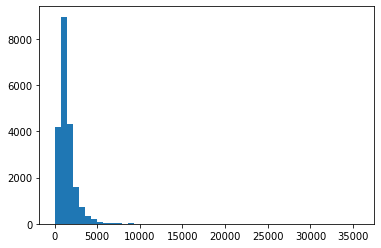

In [10]:
#LT= df["Latitude"]
Pop = df["Population"]
plt.hist(Pop,bins=50)
plt.show()

一見歪んだ正規分布に見えるが maxが分布から大きく外れた値をとっているこのような場合にminmaxで正規化しても分布の歪は修正されない

35682.0


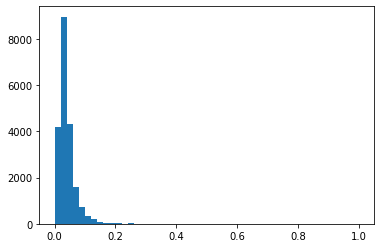

In [12]:
print(Pop.max())
P_MinMaxScaler = MinMaxScaler().fit_transform(Pop.values.reshape(-1,1))
plt.hist(P_MinMaxScaler,bins=50)
plt.show()


標準化は外れ値の影響を強くは受けないが値としては残るのであまり分布にフィットしているとはいいがたい


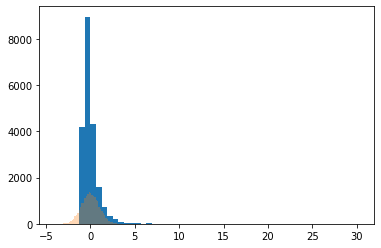

In [9]:
X_StandardScaler = StandardScaler().fit_transform(Pop.values.reshape(-1,1))
x = np.random.normal(0,1,len(X_StandardScaler))
plt.hist(X_StandardScaler,bins=50)
plt.hist(x,alpha=0.3,bins=50)
plt.show()



---



---



MedInc（収入の平均値）の分布について，なにもせずにヒストグラムを作った場合と，平均を0にした場合（分布の形状は変わらず）

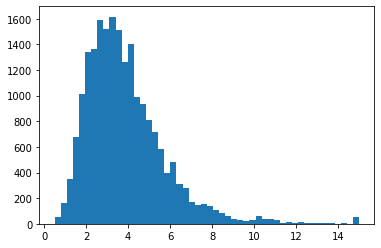

In [21]:
df_mi = df["MedInc"]
Xorg=df_mi.values.reshape(-1,1)
plt.hist(Xorg,bins=50)#収入の平均値
plt.show()

標準化(minmaxscaler)

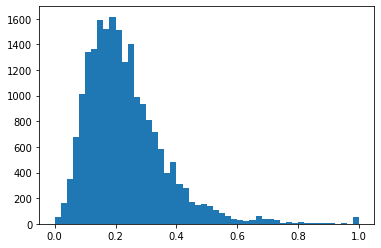

In [22]:
X= (df_mi-df_mi.describe()["mean"]).values.reshape(-1,1)
X_MinMaxScaler = MinMaxScaler().fit_transform(X)
plt.hist(X_MinMaxScaler,bins=50)
plt.show()

絶対値正規化（maxabsscaler)

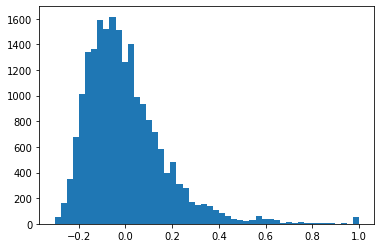

In [23]:
X_MaxAbsScaler = MaxAbsScaler().fit_transform(X)
plt.hist(X_MaxAbsScaler,bins=50)
plt.show()

標準化

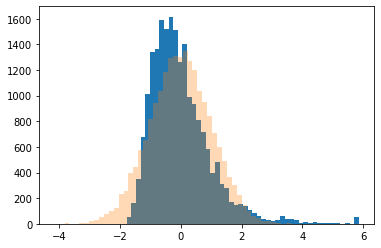

In [24]:
X_StandardScaler = StandardScaler().fit_transform(Xorg)
x = np.random.normal(0,1,len(X_StandardScaler))
plt.hist(X_StandardScaler,bins=50)
plt.hist(x,alpha=0.3,bins=50)
plt.show()

RobustScaler

(array([  50.,  163.,  347.,  675., 1012., 1341., 1363., 1592., 1524.,
        1616., 1513., 1259., 1401.,  990.,  935.,  812.,  715.,  582.,
         398.,  483.,  310.,  280.,  168.,  147.,  156.,  136.,  109.,
          86.,   60.,   36.,   28.,   23.,   33.,   58.,   36.,   35.,
          27.,   10.,   14.,    7.,   12.,   10.,    7.,    8.,   10.,
           4.,    2.,    3.,    2.,   52.]),
 array([-1.39225176, -1.25921325, -1.12617474, -0.99313622, -0.86009771,
        -0.7270592 , -0.59402069, -0.46098218, -0.32794367, -0.19490515,
        -0.06186664,  0.07117187,  0.20421038,  0.33724889,  0.47028741,
         0.60332592,  0.73636443,  0.86940294,  1.00244145,  1.13547996,
         1.26851848,  1.40155699,  1.5345955 ,  1.66763401,  1.80067252,
         1.93371104,  2.06674955,  2.19978806,  2.33282657,  2.46586508,
         2.59890359,  2.73194211,  2.86498062,  2.99801913,  3.13105764,
         3.26409615,  3.39713467,  3.53017318,  3.66321169,  3.7962502 ,
         3.92928

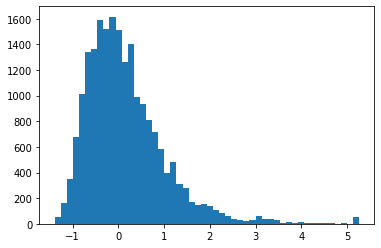

In [25]:
X_RobustScaler = RobustScaler(quantile_range=(25, 75)).fit_transform(X)
plt.hist(X_RobustScaler,bins=50)

BoxCox

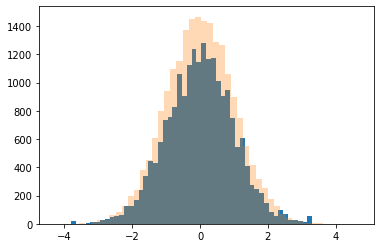

In [26]:
X_PowerTransformer_boxcox = PowerTransformer(method='box-cox').fit_transform(Xorg)
x = np.random.normal(0,1,len(X_PowerTransformer_boxcox))
plt.hist(X_PowerTransformer_boxcox,bins=50)
plt.hist(x,alpha=0.3,bins=50)
plt.show()

Yeo-Johnson

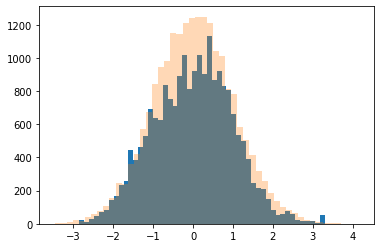

In [27]:
X_PowerTransformer_yeojohnson = PowerTransformer(method='yeo-johnson').fit_transform(X)
x = np.random.normal(0,1,len(X_PowerTransformer_yeojohnson))
plt.hist(X_PowerTransformer_yeojohnson,bins=50)
plt.hist(x,alpha=0.3,bins=50)
plt.show()

対数化

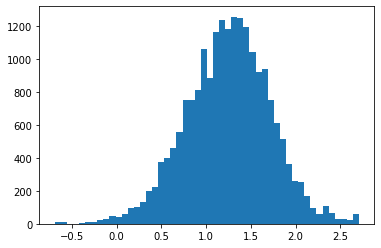

In [28]:
X_log=np.log(Xorg)
plt.hist(X_log,bins=50)
plt.show()

平方根

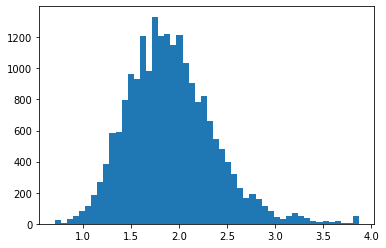

In [29]:
X_sqrt=np.sqrt(Xorg)
plt.hist(X_sqrt,bins=50)
plt.show()

平方根に対して標準化を行う

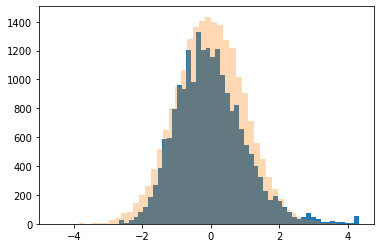

In [30]:
X_StandardScaler = StandardScaler().fit_transform(X_sqrt)
x = np.random.normal(0,1,len(X_StandardScaler))
plt.hist(X_StandardScaler,bins=50)
plt.hist(x,alpha=0.3,bins=50)
plt.show()



---



---



Latitudeに対する分布　２つの分布が重なっているようにみえる

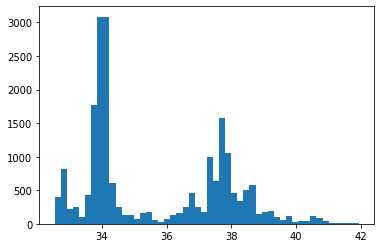

In [31]:
Xlt = df["Latitude"].values.reshape(-1,1)
plt.hist(Xlt,bins=50)
plt.show()

このような場合には１つの分布とみなしてフィッテイングしてもあまり意味がない


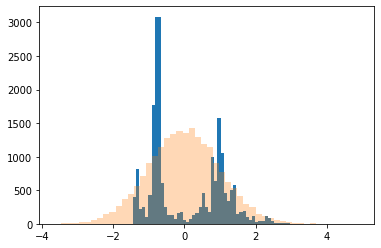

In [32]:
X_StandardScaler = StandardScaler().fit_transform(Xlt)
x = np.random.normal(0,1,len(X_StandardScaler))
plt.hist(X_StandardScaler,bins=50)
plt.hist(x,alpha=0.3,bins=50)
plt.show()